# P6

Due: 12/11/19, 11:59pm 

In this assignment, we'll look at regression and clustering methods.

First, let's get our imports and system set up. 

In [4]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import linear_model
from sklearn import cluster

## Regression 

For this part of the project we will be using a famous dataset that looks at 1000 users listening habits. 
http://ocelma.net/MusicRecommendationDataset/lastfm-1K.html

The data set is large (~650MB compressed, ~2.5GB uncompressed). 

The data is formatted one entry per line, tab-separated.  

### Task 1 (20 pts)
The first task is to process this data to recover some song statistics.  In particular, we would like to create (and save, using pickle), a pandas dataframe that contains:
    * the number of times a song has been played
    * percentage of the plays that came from users who self-identified as male
    * average age of the listener
    * percentage of plays that came from a user who played the song exactly once
    * percentage of plays that came from a user who played the song at least five times  
    
If there any missing values, decide how you will deal with them, and summarize your approach in **Task 2**.  

In [5]:
colnames = ['user-id','gender','age','country','registered']
#data = pd.read_csv('userid-profile.tsv',sep = '\t',names = colnames)
data = pd.read_csv('userid-profile.tsv',sep = '\t',skiprows=1,names = colnames)
data.set_index(['user-id','gender'])
data.head(20)


,user-id,gender,age,country,registered
0,user_000001,m,NaN,Japan,"Aug 13, 2006"
1,user_000002,f,NaN,Peru,"Feb 24, 2006"
2,user_000003,m,22.0,United States,"Oct 30, 2005"
3,user_000004,f,NaN,NaN,"Apr 26, 2006"
4,user_000005,m,NaN,Bulgaria,"Jun 29, 2006"
5,user_000006,NaN,24.0,Russian Federation,"May 18, 2006"
6,user_000007,f,NaN,United States,"Jan 22, 2006"
7,user_000008,m,23.0,Slovakia,"Sep 28, 2006"
8,user_000009,f,19.0,United States,"Jan 13, 2007"
9,user_000010,m,19.0,Poland,"May 4, 2006"


In [6]:
#colnames1 = ['musicbrainz-track-id','musicbrainz-artist-id','track-name','artist-name ','num-plays','perc-plays-male ','ave-age ','perc-plays-once','perc-plays-five']
colnames1 = ['user-id','timestamp','artist-id','artist-name ','track-id','track-name']
data01 = pd.read_csv('userid-timestamp-artid-artname-traid-traname.tsv',sep = '\t',names = colnames1)
data00 = data01
data00.set_index(['user-id','track-name'])
data01.head(20)

,user-id,timestamp,artist-id,artist-name,track-id,track-name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)
5,user_000001,2009-05-04T13:38:31Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15)
6,user_000001,2009-05-04T13:33:28Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15)
7,user_000001,2009-05-04T13:23:45Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15)
8,user_000001,2009-05-04T13:19:22Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15)
9,user_000001,2009-05-04T13:13:38Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Bibo No Aozora (Live_2009_4_15)


In [7]:
data01.to_pickle('file.pickle')
data1 = pd.read_pickle('file.pickle')

In [8]:
data_merge=data00.merge(data, how = 'left')
#data_merge = pd.merge(data, data00, on = 'user-id')
data_merge.head()
data_merge_no_dup = data_merge.drop_duplicates(['user-id','track-name'],keep= 'last')
data_merge_no_dup = data_merge_no_dup.rename(columns={'track-name': 'song'})
data_merge_no_dup = data_merge_no_dup.dropna()
data_merge_no_dup.head()
#data_merge_no_dup = data_merge_no_dup.rename(columns={'track-name': 'song'})
data_merge_no_dup['age'] = pd.to_numeric(data_merge_no_dup['age'])
data_merge_mean = data_merge_no_dup.groupby(['song'])['age'].mean()
data_merge_mean.head()

song
! (Foreword)                      23.666667
! (The Song Formerly Known As)    28.000000
! / Sn10.1.Ai 0711                29.000000
! / Sn2.Ai 0853                   29.000000
! Que Vida! (Stereo Mix)          20.000000
Name: age, dtype: float64

In [9]:
count = data1['track-name'].value_counts()
data1_r_count = count.rename_axis('song').reset_index(name='counts')
data2 = data1.drop(columns='timestamp')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19098862 entries, 0 to 19098861
Data columns (total 5 columns):
user-id         object
artist-id       object
artist-name     object
track-id        object
track-name      object
dtypes: object(5)
memory usage: 728.6+ MB


In [10]:
data2_track = data2['track-name']
data2_track.head(20)

0     Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1              Composition 0919 (Live_2009_4_15)
2                           Mc2 (Live_2009_4_15)
3                        Hibari (Live_2009_4_15)
4                           Mc1 (Live_2009_4_15)
5                   To Stanford (Live_2009_4_15)
6                 Improvisation (Live_2009_4_15)
7                       Glacier (Live_2009_4_15)
8                     Parolibre (Live_2009_4_15)
9                Bibo No Aozora (Live_2009_4_15)
10                      The Last Emperor (Theme)
11                     Happyend (Live_2009_4_15)
12                       Tibetan Dance (Version)
13              Behind The Mask (Live_2009_4_15)
14                  Boy, Boy, Boy (Switch Remix)
15        Crocodile (Innervisions Orchestra Mix)
16           Ninna Nanna In Blu (Raw Deal Remix)
17                                Elysian Fields
18                            Planetary Deadlock
19             Good Morning Love Coffee Is Ready
Name: track-name, dt

In [11]:
data2['count']= data2.groupby("track-name")["track-name"].transform('count')
data2

,user-id,artist-id,artist-name,track-id,track-name,count
0,user_000001,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007,1.0
1,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15),16.0
2,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15),12.0
3,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15),13.0
4,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15),15.0
5,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,To Stanford (Live_2009_4_15),15.0
6,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Improvisation (Live_2009_4_15),15.0
7,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Glacier (Live_2009_4_15),16.0
8,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Parolibre (Live_2009_4_15),17.0
9,user_000001,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Bibo No Aozora (Live_2009_4_15),20.0


In [12]:
data_test = len(data2[data2['track-name'] == 'Closer'])
data_test

5185

In [13]:
data2_track_size = data2_track.value_counts()
data2_track_size

Intro                                             17561
[Untitled]                                         6926
Untitled                                           6586
Home                                               6304
All I Need                                         6234
Angel                                              6002
Heartbeats                                         5676
Wake Up                                            5658
Crazy                                              5627
Such Great Heights                                 5571
Breathe                                            5517
One                                                5261
Love Will Tear Us Apart                            5195
Closer                                             5185
Hallelujah                                         5121
Run                                                5013
Lullaby                                            4876
Hurt                                            

In [14]:
data_of_male = data_merge.loc[data_merge["gender"] == 'm']
count = data_of_male['track-name'].value_counts()
data1_r_count1 = count.rename_axis('song').reset_index(name='counts')
data1_r_count1.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806742 entries, 0 to 806741
Data columns (total 2 columns):
song      806742 non-null object
counts    806742 non-null int64
dtypes: int64(1), object(1)
memory usage: 12.3+ MB


In [15]:
data_of_males = data1_r_count.merge(data1_r_count1, on = 'song', how = 'left')
data_of_males.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083480 entries, 0 to 1083479
Data columns (total 3 columns):
song        1083480 non-null object
counts_x    1083480 non-null int64
counts_y    806742 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.1+ MB


In [16]:
data_of_males.head()

,song,counts_x,counts_y
0,Intro,17561,10868.0
1,[Untitled],6926,4209.0
2,Untitled,6586,4131.0
3,Home,6304,3245.0
4,All I Need,6234,3362.0


In [17]:
data_of_males["male count"] = data_of_males["counts_y"]
data_of_males["song count"] = data_of_males["counts_x"]
data_of_males["male %"] = data_of_males["male count"] / data_of_males['song count']
data_of_males.head()

,song,counts_x,counts_y,male count,song count,male %
0,Intro,17561,10868.0,10868.0,17561,0.618871
1,[Untitled],6926,4209.0,4209.0,6926,0.607710
2,Untitled,6586,4131.0,4131.0,6586,0.627240
3,Home,6304,3245.0,3245.0,6304,0.514753
4,All I Need,6234,3362.0,3362.0,6234,0.539301


In [18]:
data_final = data_of_males[['song','song count','male %']]
data_final.head()

,song,song count,male %
0,Intro,17561,0.618871
1,[Untitled],6926,0.607710
2,Untitled,6586,0.627240
3,Home,6304,0.514753
4,All I Need,6234,0.539301


In [19]:
daaa = data_of_males['male %']
daaa.head()

0    0.618871
1    0.607710
2    0.627240
3    0.514753
4    0.539301
Name: male %, dtype: float64

In [20]:
data2_count = pd.DataFrame({'count':data2.groupby(["user-id","track-name"]).size()}).reset_index()
data2_count.head()

,user-id,track-name,count
0,user_000001,'84 Pontiac Dream,14
1,user_000001,(All I Wanted Was To Make You) Feel Good,3
2,user_000001,(D)Ecaying Beauty,1
3,user_000001,(Far From) Home,1
4,user_000001,(Get Off Your) High Horse Lady,1


In [21]:
data2_count1 = data2_count.loc[data2_count['count'] == 1]
data2_count1.head()
data_count_name = data2_count1['track-name'].count()
data_count1_1 = data2_count1['track-name'].value_counts()
data_count1_1.head()
data_count1_2 = data_count1_1.rename_axis('song').reset_index(name='counts')
data_of_males = data1_r_count.merge(data_count1_2,on='song', how='left')
data_of_males['perc_plays_once'] = data_of_males['counts_y']/data_of_males['counts_x']
data_of_males.head()

,song,counts_x,counts_y,perc_plays_once
0,Intro,17561,101.0,0.005751
1,[Untitled],6926,100.0,0.014438
2,Untitled,6586,102.0,0.015487
3,Home,6304,126.0,0.019987
4,All I Need,6234,98.0,0.015720


In [22]:
data_of_males_copy1 = data_of_males
data_of_males_copy1.head()

,song,counts_x,counts_y,perc_plays_once
0,Intro,17561,101.0,0.005751
1,[Untitled],6926,100.0,0.014438
2,Untitled,6586,102.0,0.015487
3,Home,6304,126.0,0.019987
4,All I Need,6234,98.0,0.015720


In [23]:
data_final['perc_plays_once'] = pd.Series(data_of_males['perc_plays_once'])
data_final.head()

,song,song count,male %,perc_plays_once
0,Intro,17561,0.618871,0.005751
1,[Untitled],6926,0.607710,0.014438
2,Untitled,6586,0.627240,0.015487
3,Home,6304,0.514753,0.019987
4,All I Need,6234,0.539301,0.015720


In [24]:
data2_count5 = data2_count.loc[data2_count['count'] > 4]
data2_count5.head()
data_count_name1 = data2_count5['track-name'].count()
data_count5_1 = data2_count5['track-name'].value_counts()
data_count5_1.head()
data_count5_2 = data_count5_1.rename_axis('song').reset_index(name='counts')
data_of_males = data1_r_count.merge(data_count5_2,on='song', how='left')
data_of_males['perc_plays_five'] = data_of_males['counts_y']/data_of_males['counts_x']
data_of_males.head()

,song,counts_x,counts_y,perc_plays_five
0,Intro,17561,523.0,0.029782
1,[Untitled],6926,224.0,0.032342
2,Untitled,6586,291.0,0.044185
3,Home,6304,247.0,0.039181
4,All I Need,6234,237.0,0.038017


In [25]:
data_of_males_copy5 = data_of_males
data_of_males_copy5.head()
data_final['perc_plays_five'] = pd.Series(data_of_males['perc_plays_five'])
data_final.head()

,song,song count,male %,perc_plays_once,perc_plays_five
0,Intro,17561,0.618871,0.005751,0.029782
1,[Untitled],6926,0.607710,0.014438,0.032342
2,Untitled,6586,0.627240,0.015487,0.044185
3,Home,6304,0.514753,0.019987,0.039181
4,All I Need,6234,0.539301,0.015720,0.038017


In [26]:
data_final = data_final.merge(data_merge_mean,on = 'song', how ='left')
data_final.head()

,song,song count,male %,perc_plays_once,perc_plays_five,age
0,Intro,17561,0.618871,0.005751,0.029782,24.861878
1,[Untitled],6926,0.607710,0.014438,0.032342,25.765766
2,Untitled,6586,0.627240,0.015487,0.044185,24.688889
3,Home,6304,0.514753,0.019987,0.039181,25.261538
4,All I Need,6234,0.539301,0.015720,0.038017,25.545455


In [27]:
len(data2[data2['user-id'] == 'user_001000'])

18373

In [ ]:
data_1 = data.to_pickle(file.pkl)
data_1
data_2 = pd.read_pickle(file.pkl)
data_2

In [ ]:
import pickle

In [ ]:
def create_data(fileName):
    """
    Function: create_data(fileName) 
    
    
    The function should read in the data files. Then preprocess the files as specified above, 
    to create a Data Frame that contains: 
      * the number of times a song has been played 
      * the percentage of plays that came from users who self-identify as male 
      * average age of the listener 
      * percentage of plays that came from a user who played the song exactly once 
      * percentage of plays that came from a user who played the song at least five times
    You must also decide how to deal with missing values, and implement this. 
    
    The final Data Frame should have the following columns: 
      * musicbrainz-track-id
      * musicbrainz-artist-id
      * track-name
      * artist-name 
      * num-plays
      * perc-plays-male 
      * ave-age 
      * perc-plays-once
      * perc-plays-five
      
    Save the Data Frame as a pickle file, to be used in the subsequent analysis.  
    """
    colnames = ['user-id','gender','age','country','registered']
    #data = pd.read_csv('userid-profile.tsv',sep = '\t',names = colnames)
    data = pd.read_csv('userid-profile.tsv',sep = '\t',skiprows=1,names = colnames)
    data.set_index(['user-id','gender'])
    data.head(20)
    colnames1 = ['user-id','timestamp','artist-id','artist-name ','track-id','track-name']
    data01 = pd.read_csv('userid-timestamp-artid-artname-traid-traname.tsv',sep = '\t',names = colnames1)
    data00 = data01
    data00.set_index(['user-id','track-name'])
    data01.head(20)
    data01.to_pickle('file.pickle')
    data1 = pd.read_pickle('file.pickle')
    data_merge=data00.merge(data, how = 'left')
    #data_merge = pd.merge(data, data00, on = 'user-id')
    data_merge.head()
    data_merge_no_dup = data_merge.drop_duplicates(['user-id','track-name'],keep= 'last')
    data_merge_no_dup = data_merge_no_dup.rename(columns={'track-name': 'song'})
    data_merge_no_dup = data_merge_no_dup.dropna()
    data_merge_no_dup.head()
    #data_merge_no_dup = data_merge_no_dup.rename(columns={'track-name': 'song'})
    data_merge_no_dup['age'] = pd.to_numeric(data_merge_no_dup['age'])
    data_merge_mean = data_merge_no_dup.groupby(['song'])['age'].mean()
    data_merge_mean.head()
    count = data1['track-name'].value_counts()
    data1_r_count = count.rename_axis('song').reset_index(name='counts')
    data2 = data1.drop(columns='timestamp')
    data2.info()
    data2_track = data2['track-name']
    data2_track.head(20)
    data2['count']= data2.groupby("track-name")["track-name"].transform('count')
    data2.head()
    data_of_male = data_merge.loc[data_merge["gender"] == 'm']
    count = data_of_male['track-name'].value_counts()
    data1_r_count1 = count.rename_axis('song').reset_index(name='counts')
    data1_r_count1.info(20)
    data_of_males = data1_r_count.merge(data1_r_count1, on = 'song', how = 'left')
    data_of_males.info()
    data_of_males["male count"] = data_of_males["counts_y"]
    data_of_males["song count"] = data_of_males["counts_x"]
    data_of_males["male %"] = data_of_males["male count"] / data_of_males['song count']
    data_of_males.head()
    data_final = data_of_males[['song','song count','male %']]
    data_final.head()
    data2_count = pd.DataFrame({'count':data2.groupby(["user-id","track-name"]).size()}).reset_index()
    data2_count.head()
    data2_count1 = data2_count.loc[data2_count['count'] == 1]
    data2_count1.head()
    data_count_name = data2_count1['track-name'].count()
    #data_count_name
    data_count1_1 = data2_count1['track-name'].value_counts()
    data_count1_1.head()
    data_count1_2 = data_count1_1.rename_axis('song').reset_index(name='counts')
    data_of_males = data1_r_count.merge(data_count1_2,on='song', how='left')
    data_of_males['perc_plays_once'] = data_of_males['counts_y']/data_of_males['counts_x']
    data_of_males.head()
    data_of_males_copy1 = data_of_males
    data_of_males_copy1.head()
    data_final['perc_plays_once'] = pd.Series(data_of_males['perc_plays_once'])
    data_final.head()
    data2_count5 = data2_count.loc[data2_count['count'] > 4]
    data2_count5.head()
    data_count_name1 = data2_count5['track-name'].count()
    data_count5_1 = data2_count5['track-name'].value_counts()
    data_count5_1.head()
    data_count5_2 = data_count5_1.rename_axis('song').reset_index(name='counts')
    data_of_males = data1_r_count.merge(data_count5_2,on='song', how='left')
    data_of_males['perc_plays_five'] = data_of_males['counts_y']/data_of_males['counts_x']
    data_of_males.head()
    data_of_males_copy5 = data_of_males
    data_of_males_copy5.head()
    data_final['perc_plays_five'] = pd.Series(data_of_males['perc_plays_five'])
    data_final.head()
    data_final = data_final.merge(data_merge_mean,on = 'song', how ='left')
    data_final.head()
    data_final.to_pickle('file.pickle')


*Note* After you are done creating the DataFrame you are to use, you can delete the original data (if you loaded it into an object). 

For example: 

In [ ]:
create_data()
songs = pd.read_pickle('file.pickle')

In [66]:
df = pd.DataFrame({'foo': [1,2,3,4]})

In [68]:
df

In [9]:
del df

*Note* After this point you can clear the other objects, and start by loading in the data stored to your pickle file

### Task 2 (4 points) 

Describe how you handled any missing data.  This should be written in as a paragraph with full sentences.  You should expect that someone reading your description could pre-process the data in the same manner as you.  Be brief but complete. 

In [ ]:
In the given large data there somany null values present and unnecessary coloum have been removed.
Also I have taken a new dataframe in which I have merged the data from two data frames.
I have filled with some values in place of Nan.

### Task 3 (16 points) 

Explore the data set created in Task 1 by generating some descriptive statistics (expect 3-5 tables, plots, summary statistics). After each code block, you should have summary statements (in full and complete sentences - be brief but complete).  

In [45]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1083480 entries, 0 to 1083479
Data columns (total 6 columns):
song               1083480 non-null object
song count         1083480 non-null int64
male %             806742 non-null float64
perc_plays_once    718473 non-null float64
perc_plays_five    333112 non-null float64
age                330859 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 57.9+ MB


In [ ]:
# Task 3.1

*Task 3.1 summary statement* 



In [201]:
# Task 3.1

In [203]:
data_final_head_10000 = data_final.head(100000)
data_final_head_10000.head(10)


,song,song count,male %,perc_plays_once,perc_plays_five,age
0,Intro,17561,0.618871,0.005751,0.029782,24.861878
1,[Untitled],6926,0.607710,0.014438,0.032342,25.765766
2,Untitled,6586,0.627240,0.015487,0.044185,24.688889
3,Home,6304,0.514753,0.019987,0.039181,25.261538
4,All I Need,6234,0.539301,0.015720,0.038017,25.545455
5,Angel,6002,0.548984,0.015828,0.046485,25.229008
6,Heartbeats,5676,0.321882,0.008280,0.028365,24.971429
7,Wake Up,5658,0.598268,0.023153,0.048074,25.433566
8,Crazy,5627,0.595877,0.018838,0.041585,25.540984
9,Such Great Heights,5571,0.475678,0.011668,0.033567,24.467391


In [259]:
u5 = data_final_head_10000[(data_final_head_10000['age'] > 21) | (data_final_head_10000['age'] < 25)]
u6 = data_final_head_10000[(data_final_head_10000['age'] > 24) | (data_final_head_10000['age'] < 27)]
u7 = data_final_head_10000[(data_final_head_10000['age'] > 27) | (data_final_head_10000['age'] < 35)]

In [260]:
u8 = u5
u9 = u6
u10 = u7

No handles with labels found to put in legend.


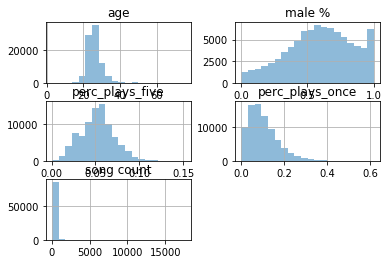

In [248]:
u8.hist(density=0, histtype = 'stepfilled',alpha=0.5, bins = 20, label= 'age in 21 and 25')
plt.xlabel('song', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()

No handles with labels found to put in legend.


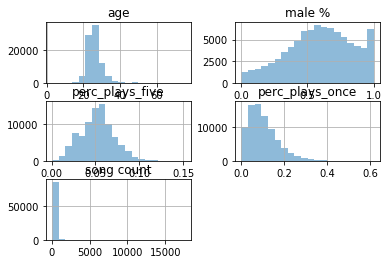

In [252]:
u9.hist(density=0, histtype = 'stepfilled',alpha=0.5, bins = 20, label='age in 25 and 27')
plt.xlabel('song', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()

No handles with labels found to put in legend.


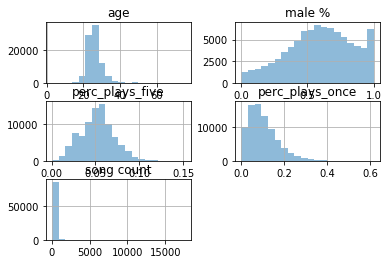

In [261]:
u10.hist(density=0, histtype = 'stepfilled',alpha=0.5, bins = 20, label='age in 27 and 35')
plt.xlabel('song', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.legend()

No handles with labels found to put in legend.


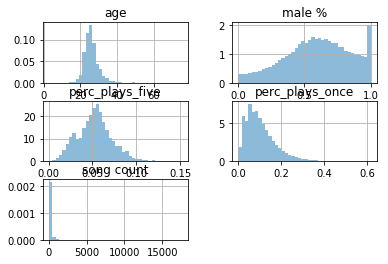

In [253]:
u8.hist(density=1, histtype = 'stepfilled',alpha=0.5, bins = 40, label='age in 21 and 25')
plt.xlabel('track-id', fontsize=14)
plt.ylabel('PFM', fontsize=14)
plt.legend()


No handles with labels found to put in legend.


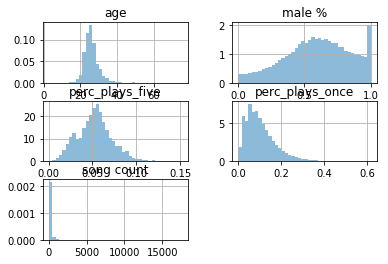

In [254]:
u9.hist(density=1, histtype = 'stepfilled',alpha=0.5, bins = 40, label='age in 25 and 27')
plt.xlabel('track-id', fontsize=14)
plt.ylabel('PFM', fontsize=14)
plt.legend()


No handles with labels found to put in legend.


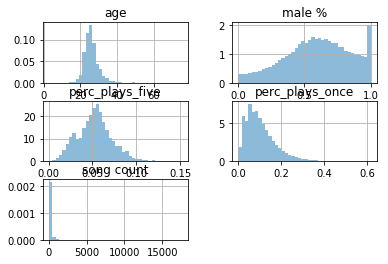

In [255]:
u10.hist(density=1, histtype = 'stepfilled',alpha=0.5, bins = 40, label='age in 27 and 30')
plt.xlabel('track-id', fontsize=14)
plt.ylabel('PFM', fontsize=14)
plt.legend()


No handles with labels found to put in legend.


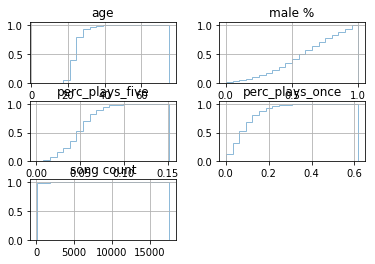

In [256]:
u8.hist(density=1, histtype = 'step',alpha=0.5, bins = 20, label='age in 21 and 25',cumulative=True)
plt.xlabel('track-id', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.legend()



No handles with labels found to put in legend.


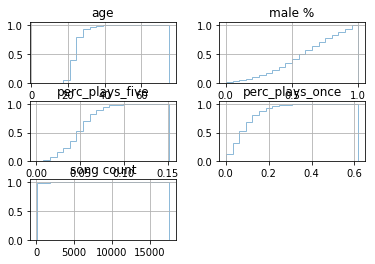

In [257]:
u9.hist(density=1, histtype = 'step',alpha=0.5, bins = 20, label='age in 25 and 27',cumulative=True)
plt.xlabel('track-id', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.legend()

No handles with labels found to put in legend.


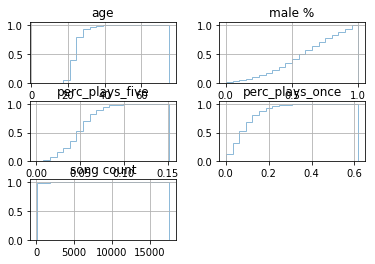

In [258]:
u10.hist(density=1, histtype = 'step',alpha=0.5, bins = 20, label='age in 27 and 30',cumulative=True)
plt.xlabel('track-id', fontsize=14)
plt.ylabel('CDF', fontsize=14)
plt.legend()

*Task 3.2 summary statement* 

#summary
The most songs are played in the age group of 20 to 30 and the male percentage is more compared to female listners.

In [ ]:
data_final_head = data_final.head(50)
data_final_head.head()

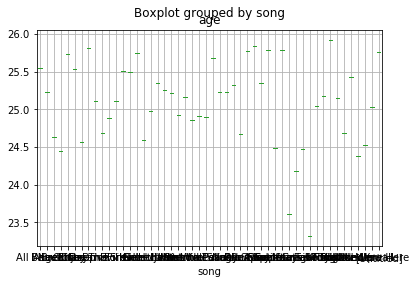

In [196]:
# Task 3.3 
data_final_head.boxplot(by="song", column = "age")

*Task 3.3 summary statement* 


#summary
From the figure we can see that most of the song listerns are from age group above 22. The most of the songs listerns are the age group of 22 and 26.

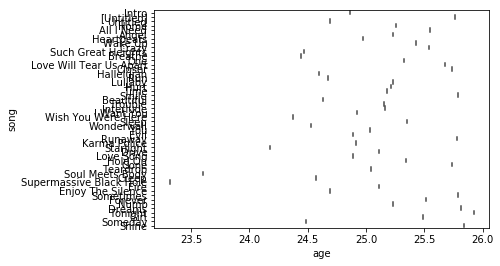

In [262]:
import seaborn as sns
sns.violinplot(x="age",y='song',data = data_final_head)

#summary
From the figure we can see that most of the song listerns are from age group above 22. The most of the songs listerns are the age group of 22 and 26.

### Task 4 (15 points) 

Using k-fold cross-validation, apply a linear regression model. Here, the response variable is the number of times a song has been played based on what we know about the listeners (in the data set generated in Task 1). Be sure to return the model score on both the training and validation data.

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
music_data_4 = data_final[['perc_plays_once','perc_plays_five']]
music_data_4 = music_data_4.fillna(0)
music_data_3 = data_final['song count']
music_data_3 = music_data_3.fillna(0)
X_train, X_test, y_train, y_test = train_test_split(music_data_4, music_data_3, test_size = 0.33)

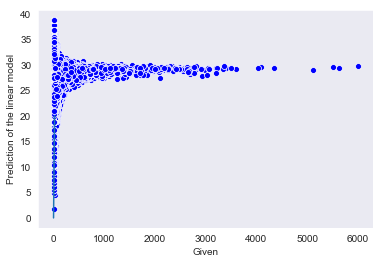

In [33]:
linear_model = linear_model.LinearRegression()
model = linear_model.fit(X_train, y_train)
prediction_lm = linear_model.predict(X_test)
sns.set_style('dark')
plot = sns.scatterplot(y_test, prediction_lm,color = 'b')
plot.set(xlabel='Given', ylabel='Prediction of the linear model')
x_plot = np.linspace(0,20,70)
y_plot = x_plot
plt.plot(x_plot, y_plot)

### Task 5 (5 points) 

Explain your results.  Specifically address, if the assumption of linear response to the input features was reasonable.  You will want to study a plot of the model's residual.  Ideally, the residuals are small in magnitude, and are evenly distributed about the true values.  What are some possible improvements that can be made?

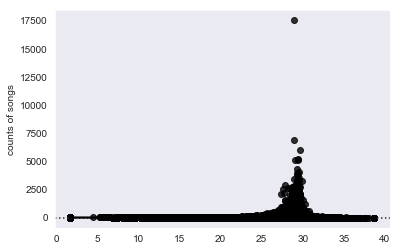

In [35]:
import seaborn as sns
X_train, X_test, y_train, y_test = train_test_split(music_data_4, music_data_3, test_size = 0.33)
prediction_lm = linear_model.predict(X_test)
sns.residplot(prediction_lm,y_test,lowess=True, color="black")

### Bonus Task (5 points) 

Suppose we are instead curious about whether a song will be played by a user based on a demographics.  Apply a linear SVM model and report your results.

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
X_train, x_test, y_train, y_test = train_test_split(music_data_4, music_data_3, test_size = 0.33)
svm = SVC(kernel='rbf', random_state=0, gamma='auto', C=1)
scores = cross_val_score(svm, x_test, y_test, cv=10, scoring='accuracy')
scores_mean = scores.mean()
scores_error = 1 - scores_mean
#Score_roc_auc = cross_val_score(svm, x_test, y_test, cv=10,scoring='roc_auc')
#score_roc_auc_mean = Score_roc_auc.mean()
print("Then Accuracy", scores_mean)
print("Then Error", scores_error)
#print("Then AUC:", score_roc_auc_mean)
print("...........")

C:\winapps\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


## Clustering 

For this part of the project you will consider methods to group members of U.S. House of Representatives based on their voting records.  The voting records from congress are available at [Office of the Clerk, US House of Representatives](http://clerk.house.gov/legislative/legvotes.aspx), but not in a form that is easily digestible for analysis.

In fact it was only in 2016, that Congress agreed to make legislative data available themselves.  [Govtrack.us](Govtrack.us) has links to primary data sources and api's projects that collect and release the data in easier digestible forms: 

* Github Congress project - https://github.com/unitedstates/congress 
* ProPublica's Congress API - https://projects.propublica.org/api-docs/congress-api/

A long-standing project to document congressional roll call votes at the [Inter-university Consortium for Political and Social Research (ICPSR)](https://www.icpsr.umich.edu/icpsrweb/ICPSR/series/159).  This data includes roll call votes from 1789 - 1990. The ICPSR formatting for storing this data has been used on other sites which are keeping up with the creating a record, e.g., at [UCLA](https://voteview.polisci.ucla.edu).  For more recent years of Congress, data is collected at the following site: [https://voteview.com/data](https://voteview.com/data)

For instance, to explore the 116th Congress, there are two formats for looking at the data: 

* `H116_votes.ord`  
* `H116_votes.csv` 

The format of the `H116_votes.ord` data file is similar to what you say in the GettingData portion of the course.  The data consists of many fixed width items listed for each Congressperson (including their votes for each roll call). For example, the first few lines start as: 

`1162137641 1ALABAMA 200  BYRNE      66616616 ...`  
`1162119241 2ALABAMA 200  ROBY       66616616 ...`  
`1162030141 3ALABAMA 200  ROGERS     66616616 ...` 

The structure of the data is (https://voteview.com/articles/data_help_members): 

* 3 Digits - Congress number 
* 5 Digits - ICPSR number (unique id for each member of Congress) 
* 2 Digits - ICPSR state code 
* 2 Digits - District number  
* 8 Characters - State name 
* 3 Digits - Party code: (broadly 100 - Democratic Party, 200 - Republican Party) https://voteview.com/articles/data_help_parties
* 2 Digits - ICPSR Occupancy and Office code
* 11 Characters - Member's name 
* Remaining Digits - Votes case  
information encoded using vote cast code: https://voteview.com/articles/data_help_votes

The format of the `H116_votes.csv` data file is structure differently.  For example the first few lines are: 

`congress,chamber,rollnumber,icpsr,cast_code,prob`  
`116,House,1,14066,6,100.0`  
`116,House,1,14657,6,100.0`  
`116,House,1,14854,6,100.0`

Information about each column of the data is given: https://voteview.com/articles/data_help_votes.

As of 11/20/19 there were 623 roll call votes in the 116th Congress.  
 

### Task 6 (10 points) 

You will need to collect the voting information for each member of 116th Congress. Using one of the two file format's provided. 

The first 6 votes of the 116th Congress have to do with electing the Speaker of the House and rules votes; remove these first 6 votes from further consideration.


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn import linear_model
from sklearn import cluster   

In [10]:
data = pd.read_csv("H116_votes.csv")
data.head(20)

,congress,chamber,rollnumber,icpsr,cast_code,prob
0,116,House,1,14066,6,100.0
1,116,House,1,14657,6,100.0
2,116,House,1,14854,6,100.0
3,116,House,1,14863,6,100.0
4,116,House,1,14873,1,99.9
5,116,House,1,15019,7,65.0
6,116,House,1,15029,1,99.7
7,116,House,1,15124,1,100.0
8,116,House,1,15410,1,100.0
9,116,House,1,15431,1,100.0


In [11]:
data1 = data[~data['rollnumber'].isin([1,2,3,4,5,6])]
#data1 = data.drop(index = [0,1,2,3,4,5])
data1.head(20)

,congress,chamber,rollnumber,icpsr,cast_code,prob
2594,116,House,7,14066,1,99.7
2595,116,House,7,14657,1,100.0
2596,116,House,7,14854,1,100.0
2597,116,House,7,14863,1,90.6
2598,116,House,7,14873,6,100.0
2599,116,House,7,15019,6,99.8
2600,116,House,7,15029,6,100.0
2601,116,House,7,15124,6,100.0
2602,116,House,7,15410,6,100.0
2603,116,House,7,15431,6,100.0


In [12]:
data_no_name = data.drop(columns = 'chamber')
data_no_name.dropna(inplace=True)

### Task 7 (15 points) 

Apply K-means clustering to the voting data, using Euclidean distance as a measure on the cast votes.  

Try several different values of $k$ and report back which should be selected (include a figure).  

In [13]:
column_name = ['Congress number','ICPSR number','ICPSR state code','District number','State','Party_code','ICPSR Occupancy and Office code','Members name','Votes case']
#data1 = pd.read_csv("H116_votes.ord",delimiter = ' ', names=column_name)
data1= pd.read_fwf('H116_votes.ord', widths=[3,5,2,2,8,3,2,11,623], header=None, names=column_name,encoding='utf-8')
data1.head(20)


,Congress number,ICPSR number,ICPSR state code,District number,State,Party_code,ICPSR Occupancy and Office code,Members name,Votes case
0,116,21376,41,1,ALABAMA,200,NaN,BYRNE,6661661616111666161616161611161166161661611166...
1,116,21192,41,2,ALABAMA,200,NaN,ROBY,6661661616111166161616161611161166161661111166...
2,116,20301,41,3,ALABAMA,200,NaN,ROGERS,6661661616111666161616161611161166161661611166...
3,116,29701,41,4,ALABAMA,200,NaN,ADERHOLT,6661661616111666161616161611161166161661611166...
4,116,21193,41,5,ALABAMA,200,NaN,BROOKS,6661661616161966661616161611161166161661611166...
5,116,21500,41,6,ALABAMA,200,NaN,PALMER,6661661616111666161616161611161166161661111166...
6,116,21102,41,7,ALABAMA,100,NaN,SEWELL,1119116161111111116161616111911111116111161111...
7,116,14066,81,1,ALASKA,200,NaN,YOUNG,6661661616911666161616161611161166161661611166...
8,116,21739,61,1,ARIZONA,100,NaN,O'HALLERAN,1116116161111911116161616111111111116111161111...
9,116,20902,61,2,ARIZONA,100,NaN,KIRKPATRICK,1116116161111911116161616111111111116111161111...


In [14]:
data1['Votes_Cast'] = data1['Votes case'].str[6:]
#ord_data.drop(columns=['ICPSR_Occupancy_code'],inplace=True)
del data1['ICPSR Occupancy and Office code']
data1.dropna(axis=0, how='all', thresh=None, subset=None, inplace=True)
data1.reset_index(inplace=True)

In [15]:
votes=data1
votes['Votes_Cast'] = votes['Votes_Cast'].str[6:]
votes['Votes_Cast'] = votes['Votes_Cast'].str.strip()
votes=votes['Votes_Cast'].str.split( "(?!^)", expand = True)
votes = votes.apply(pd.to_numeric) 
votes.drop(votes.columns[len(votes.columns)-1], axis=1, inplace=True)
Party_code=data1.Party_code
votes= votes.assign(Party_Code = Party_code)


In [16]:
votes.head()

,0,1,2,3,4,5,6,7,8,9,...,602,603,604,605,606,607,608,609,610,Party_Code
0,1,6,6,6,1,6,1,6,1,6,...,6,1,1,1,1,1,1,1,6,200
1,1,1,6,6,1,6,1,6,1,6,...,6,1,1,1,1,1,1,1,1,200
2,1,6,6,6,1,6,1,6,1,6,...,6,1,1,1,1,1,1,1,6,200
3,1,6,6,6,1,6,1,6,1,6,...,6,1,1,1,1,1,1,1,6,200
4,1,9,6,6,6,6,1,6,1,6,...,6,1,1,1,1,1,1,1,6,200


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
from matplotlib import cm

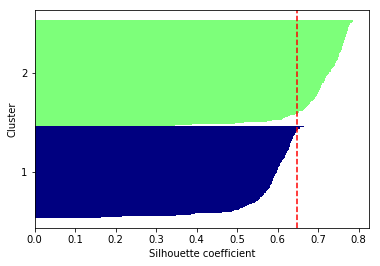

In [19]:
x = votes.loc[:, votes.columns != 'Party_code'].values
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(x)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(x, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

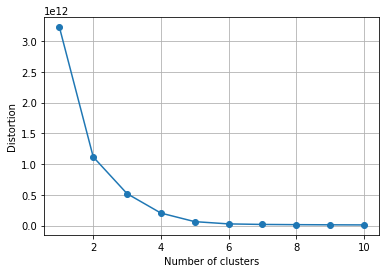

In [279]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(data_no_name)
    distortions.append(km.inertia_)

    
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()
plt.show()

### Task 8 (10 points) 

Repeat the analysis but change the representation of the cast vote codes: 

| Original Code | New Code | 
|---------------|----------| 
|  0  |  0   |  
|  1  |  1   | 
|  2  |  1   | 
|  3  |  1   | 
|  4  |  3   | 
|  5  |  3   | 
|  6  |  3   | 
|  7  |  2   | 
|  8  |  2   | 
|  9  |  2   | 

Also, change the distance measure to Manhattan distance.   

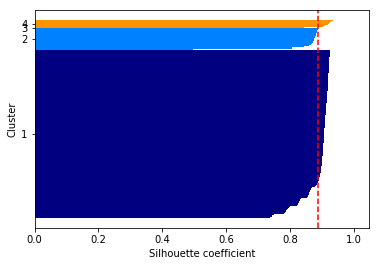

In [6]:
data_no_name.replace([1, 2, 3], 1,inplace=True)
data_no_name.replace([4, 5, 6], 3,inplace=True)
data_no_name.replace([7, 8, 9], 2,inplace=True)

votes = data_no_name
km = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
y_km = km.fit_predict(data_no_name)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(data_no_name, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color="red",linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

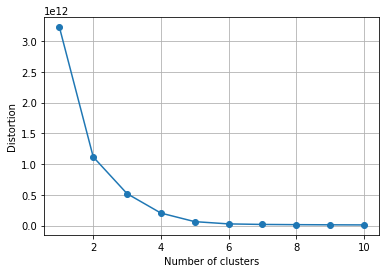

In [310]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,init='k-means++', n_init=10, max_iter=100, random_state=0)
    km.fit(data_no_name)
    distortions.append(km.inertia_)   
plt.plot(range(1,11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.grid()
plt.show()

### Task 9 (5 points) 

Report out the members (name, state, district) that are closest to the centroid of the clusters (using the results from Task 8).

Report out the members (name, state, district) that are furthest from the centroid of the clusters (using the results from Task 8).

### Bonus 2 (5 points) 

Visualize the separation in cluster by party. 
Take your vote data from Task 8 and run PCA on this data set.  Create a scatter plot of the first two principal components with the points colored by party (red - republicans, blue - democrats).  

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

In [313]:
votes.head()

,0,1,2,3,4,5,6,7,8,9,...,596,597,598,599,600,601,602,603,604,Party_Code
0,1,6,1,6,1,6,1,6,1,1,...,6,1,1,1,1,1,1,1,6,200
1,1,6,1,6,1,6,1,6,1,1,...,6,1,1,1,1,1,1,1,1,200
2,1,6,1,6,1,6,1,6,1,1,...,6,1,1,1,1,1,1,1,6,200
3,1,6,1,6,1,6,1,6,1,1,...,6,1,1,1,1,1,1,1,6,200
4,1,6,1,6,1,6,1,6,1,1,...,6,1,1,1,1,1,1,1,6,200


C:\winapps\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\winapps\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


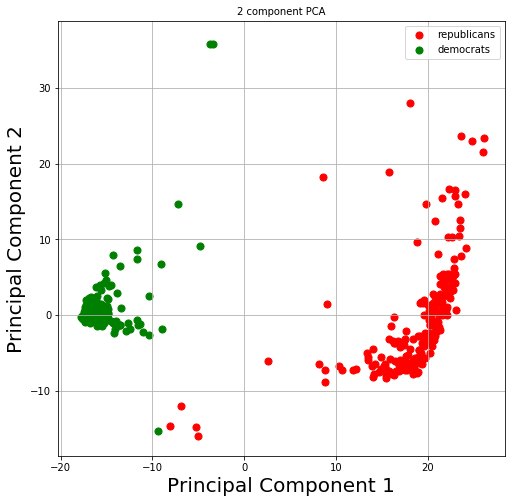

In [312]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = votes.loc[:, votes.columns != 'Party_code'].values
y = data1.loc[:,['Party_code']].values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, data1[['Party_code']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 20)
ax.set_ylabel('Principal Component 2', fontsize = 20)
ax.set_title('2 component PCA', fontsize = 10)
targets = [200, 100]
k=['republicans','democrats']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Party_code'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(k)
ax.grid()